## House Prices: Advanced Regression Techniques

This is an exercise of google's House prediction project.
    Althought, House prices prediction is a simply project that the beginner know all too well. But the Google give as a challenge for this project. 
    There are a lot of variables to gradually consider and use some techniqes as much as possible like the real project
    
### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\n_int\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import all files to notebook

In [2]:
train = pd.read_csv('./data/train.csv',index_col = 'Id')
test = pd.read_csv('./data/test.csv',index_col = 'Id')
ans = pd.read_csv('./data/sample_submission.csv',index_col = 'Id')

In [3]:
#explore ans's header
ans.head()

,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977


In [4]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Merge dataframe

Label and variable for test set were seperate into two table
Then we might merge them into one table by referent to their ID column

#### using pandas merge function for merge 2 table by columns
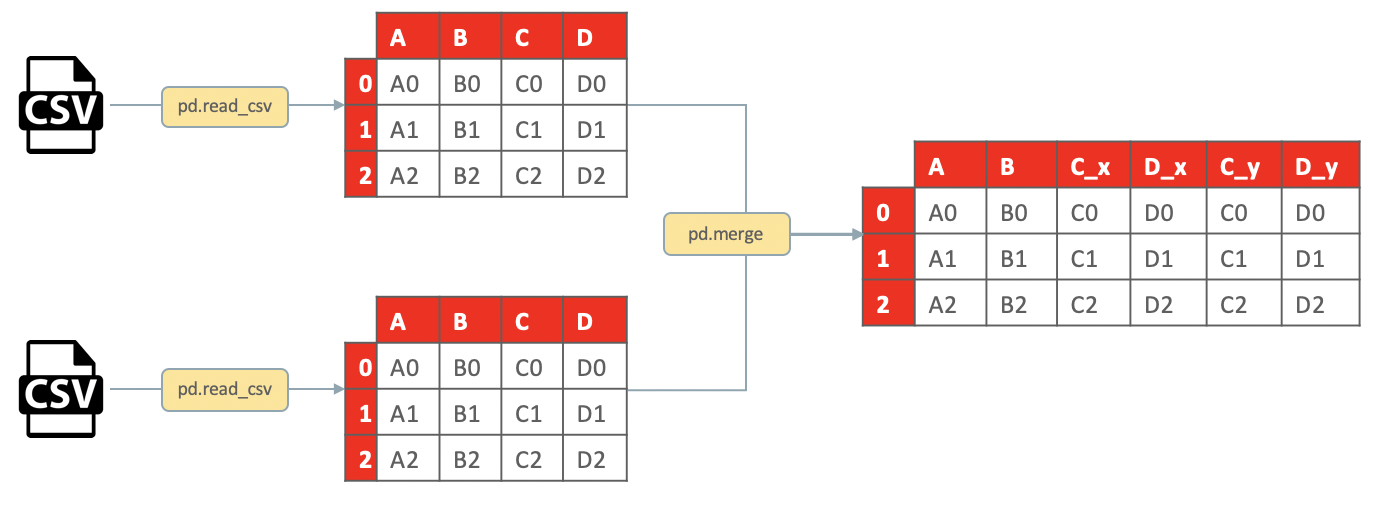

In [5]:
test = pd.merge(test,ans,on= 'Id')
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [6]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### before building machine learning model
Honestly, The exploding dataset into the dataframe isn't enough to get the idea to build the machine leaning model. Despite, the easy way to end the projects are use every item in your data to build model 


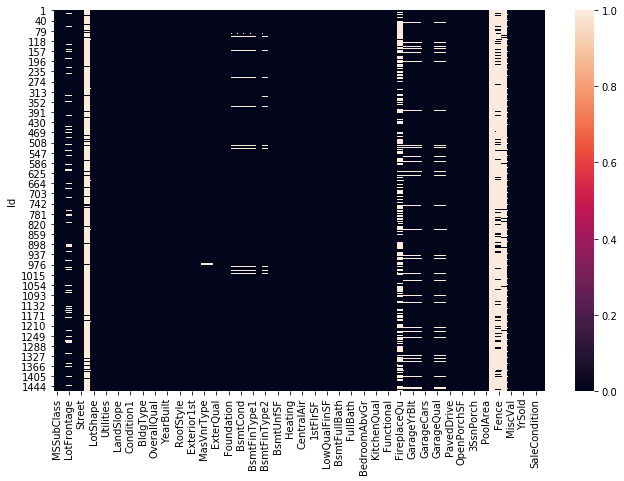

In [8]:
#obsercation null variable by Heat map visualization
plt.figure(figsize = (11,7))
sns.heatmap(train.isnull())

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

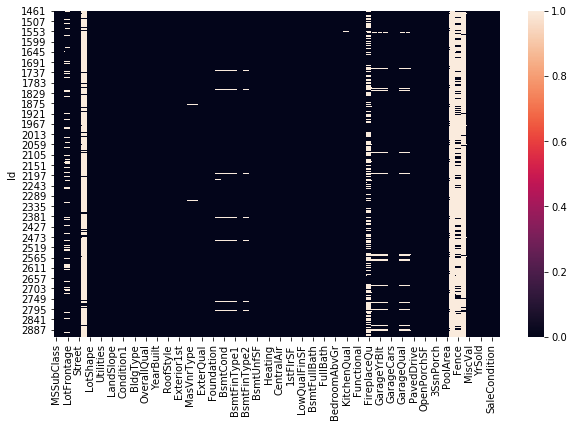

In [10]:
#obsercation null variable by Heat map visualization
plt.figure(figsize = (10,6))
sns.heatmap(test.isnull())

### Feature selection

The most important technic to tuning model is feature selection.
In order to drop variable that to much nonnull variable

### delete the columns contain nonnull over than 30% 

If there are too many nonnull variable. They unusable for prediction.


In [11]:
null = []
for i in train.columns:
    val = pd.value_counts(train[i].isnull())
    if val[0] == train.shape[0]:
        continue
    else:
        div = val[0]/val[1]
        if div <= 0.3:
            null.append(i)
        else:
            continue

In [12]:
null

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
delete_col = ['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [14]:
train_delete_col = train.drop(delete_col,axis=1,)
test_delete_col = test.drop(delete_col,axis=1)

In [15]:
train_clean = train_delete_col.dropna()
test_clean = test_delete_col.dropna()

In [16]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 1 to 1460
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   object 
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   object 
 5   LotShape       1094 non-null   object 
 6   LandContour    1094 non-null   object 
 7   Utilities      1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   object 
 10  Neighborhood   1094 non-null   object 
 11  Condition1     1094 non-null   object 
 12  Condition2     1094 non-null   object 
 13  BldgType       1094 non-null   object 
 14  HouseStyle     1094 non-null   object 
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

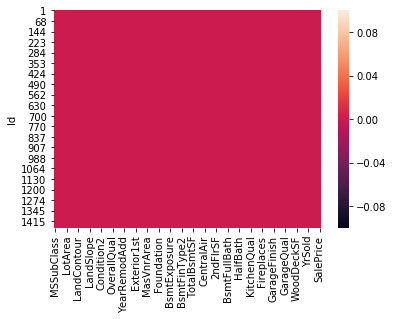

In [17]:
#Explore NA number in Data
sns.heatmap(train_clean.isnull())

In [18]:
#Explore object types columns
object_col = train_clean.select_dtypes(include='object').columns
print(object_col)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [23]:
#create label encoder function
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
encoder_data = []
def encoder(data):
    data_col = data.columns
    data_index = data.index
    row = data.shape[0]
    columns = data.shape[1]
    le = LabelEncoder()
    for i in data.columns:
        encoder_data.append(le.fit_transform(data[i]))
    return pd.DataFrame(np.reshape(np.array(encoder_data),(row,columns)),columns=data_col,index=data_index) 

In [20]:
train_obj_encoder = encoder(train_clean[object_col])
# test_obj_encoder = encoder(test_clean[object_col])

In [21]:
train_completely_clean = pd.merge(train_clean.drop(columns = object_col),train_obj_encoder,how='inner',on = 'Id')

In [24]:
test_obj_encoder = encoder(test_clean[object_col])
test_completely_clean = pd.merge(test_clean.drop(columns = object_col),test_obj_encoder,how='inner',on = 'Id')

In [25]:
data_corr = train_completely_clean.corr()
key = data_corr['SalePrice'][data_corr.SalePrice>0.3].keys()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train = train_completely_clean[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
y_train = train_completely_clean['SalePrice']

X_test = test_completely_clean[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
y_test = test_completely_clean['SalePrice']

In [27]:
data_corr['SalePrice'][data_corr.SalePrice>0.3]

LotFrontage     0.343978
LotArea         0.302268
OverallQual     0.795437
YearBuilt       0.523434
YearRemodAdd    0.519806
MasVnrArea      0.485409
BsmtFinSF1      0.378678
TotalBsmtSF     0.617741
1stFlrSF        0.617692
2ndFlrSF        0.302569
GrLivArea       0.707481
FullBath        0.578299
TotRmsAbvGrd    0.560521
Fireplaces      0.458182
GarageYrBlt     0.502248
GarageCars      0.652103
GarageArea      0.620772
WoodDeckSF      0.330286
OpenPorchSF     0.338600
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [28]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = lm.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score
case1_mse = mean_squared_error(y_test,y_pred)
case1_mae = mean_absolute_error(y_test,y_pred)
case1_r2  = r2_score(y_test,y_pred)
print(case1_mse)
print(case1_mae)
print(case1_r2)

5013246246.398743
56074.035045989316
-20.457134947098936


### Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train_allvar,y_train_allvar)
ytree_pred = tree.predict(X_test_allvar)
tree_mse = mean_squared_error(ytree_pred,y_test_allvar)
tree_mae = mean_absolute_error(ytree_pred,y_test_allvar)
tree_r2 = r2_score(ytree_pred,y_test_allvar)
print(tree_mse)
print(tree_mae)
print(tree_r2)

6659462803.779237
58421.7078416909
0.0613408487694409
